<a href="https://colab.research.google.com/github/jjcheung/ctcuc22/blob/main/CheckDigitRevisionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check digit validation revision practice - Barcode

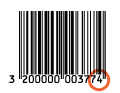

The last digit of a barcode number is a computer check digit which makes sure the barcode is correctly composed.

https://www.gs1.org/services/check-digit-calculator

## Task 1
Write program code with functions `is_valid_gtin13(barcode)` and `generate_check_gtin13(barcode)` to check if a GTIN-13 barcode number is valid. You may use the sample GTIN-13 barcode number `6291041500213` provided at https://www.gs1.org/services/how-calculate-check-digit-manually and generate additional ones at https://www.gs1.org/services/check-digit-calculator

In [ ]:
# GTIN13 Barcode Validator
weights = [3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3]

def generate_check_gtin13(barcode):
    total = 0
    for i in range(len(barcode)):
        total += int(barcode[i]) * weights[i-len(barcode)]
    
    check = str(10 - (total % 10))
    return check


def is_valid_gtin13(barcode):
     
    if len(barcode) != 13:
        return False
    elif not barcode.isnumeric():
        return False

    check = barcode[-1]
    if check == generate_check_gtin13(barcode[:-1]):
        return True
    else:
        return False

# main
#print(generate_check_gtin13('629104150021'))
print(is_valid_gtin13('6291041500213')) # returns True
print(is_valid_gtin13('')) # insert invalid GTIN-13 barcode that returns False

True
False


## Task 2
Write validators for GTIN-8, GTIN-12, GTIN-14, GSIN and SSCC barcode numbers. You should adapt the pattern in Task 1.

## Task 3
Write a generic validator comprising `is_valid_barcode(barcode)` and `generate_check_barcode(barcode)` that can take in any GTIN-8, GTIN-12, GTIN-13, GTIN-14, GSIN and SSCC barcode number. You should generalise the pattern in Task 2.

In [ ]:
weights = [3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3]

def is_valid_barcode(barcode):
    if len(barcode) not in [8, 12, 13, 14, 17, 18]:
        return False
    elif not barcode.isnumeric():
        return False

    if generate_check_barcode(barcode[:-1]) == barcode[-1]:
        return True
    else:
        return False

def generate_check_barcode(barcode):
    total = 0
    for i in range(len(barcode)):
        total += int(barcode[i]) * weights[i-len(barcode)]
    
    check = 10 - (total % 10)
    return str(check)

# main
#print(generate_check_gtin13('629104150021'))
print(is_valid_barcode('6291041500213')) # GTIN13
print(is_valid_barcode('34122341')) #GTIN8
print(is_valid_barcode('127834687327')) #GTIN12
print(is_valid_barcode('21127834687436')) #GTIN14
print(is_valid_barcode('43221127834687431')) #GSIN
print(is_valid_barcode('543221127834687436')) #SSCC

True
True
True
True
True
True


## Task 4
Write validation checks for your generic barcode number validator in Task 3 involving (where appropriate)
- presence check
- length check
- range check
- format check
- check digit check
- existence check

In [ ]:
valid_check = False

while not valid_check:
    barcode = input('Enter barcode no: ')
    if len(barcode) == 0:
        print('Empty input')
    elif len(barcode) not in [8, 12, 13, 14, 17, 18]:
        print('Wrong barcode length')
    elif not barcode.isnumeric():
        print('Barcode should only contain numeric digits')
    elif not is_valid_barcode(barcode):
        print('Invalid check digit')
    else:
        valid_check = True

print('Valid check digit')

Enter barcode no: 600253124031474363
Valid check digit


## Task 5
Generate up to 3 valid barcode numbers making use of your generic barcode number validator.

In [ ]:
import random

def genrandombarcode(length):
    barcode = ''
    for i in range (length):
        barcode += str(random.randint(0,9))
    return barcode + generate_check_barcode(barcode)

#main
loop = 3
length = [8, 12, 13, 14, 17, 18]
for i in range(loop):
    i = random.randint(0,len(length)-1)
    print(genrandombarcode(length[i]-1))


284835174787567116
50453205654868843
70313017797719


## Task 6
How many valid GTIN-13 barcode numbers 
- end with 8?
- start with 3 and end with 8?
- start with x and end with y?

In [ ]:
def count8():
    count = 0
    for i in range(1, 999999999999):
        barcode = str(i).zfill(12)
        if generate_check_barcode(barcode) == '8':
            count += 1
    print(count)

count8()

In [ ]:
def count38():
    count = 0
    for i in range(300000000000, 399999999999):
        barcode = str(i).zfill(12)
        if generate_check_barcode(barcode) == '8':
            count += 1
    print(count)

count38()

In [ ]:
def countxy(x, y):
    count = 0
    start = x * 10^11 
    end = (x + 1) * 10^11 - 1
    for i in range(start, end):
        barcode = str(i)
        if generate_check_barcode(barcode) == str(y):
            count += 1
    print (count)

countxy (3, 4)


In [ ]:
for 

How have you applied Computational Thinking (CT) in this revision practice?

For practicality, you may use the following CT ideas:

- abstraction
- decomposition
- pattern recognition
- algorithm design

Give your answer in the text cell below.

Your say: 